# Summary of HW5: Main Points

Over the course of the following homework you'll walk through a guided tutorial on **Regression** and its uses.

* We'll start with looking at regression on different relations in data (linear, quadratic, etc.).

* Then you'll work on building your own regression tool.

* You'll finish the homework by tying the ideas of these different relations (linear, quadratic) into neural networks to understand **why** we use neural networks.

### Section 1 : Basic Linear Regression (25 points)

Let's begin with **some straightforward linear regression** on some basic datasets. Take a look at the data we are using below.

##### Dataset Preparation (DO NOT MODIFY!)
Below is the essential code for preparing our dataset for analysis. **Please do not alter this code**. Instead, observe and understand the steps being taken.

Once our dataset is ready, we will proceed to train our linear regression model and evaluate how well it explains the data.


The dataset includes:

- (1) "linear" : A linear dataset
- (2) "convex" : A second-order polynomial Dataset
- (3) "trigonometric" : A higher-order trigonometric Dataset


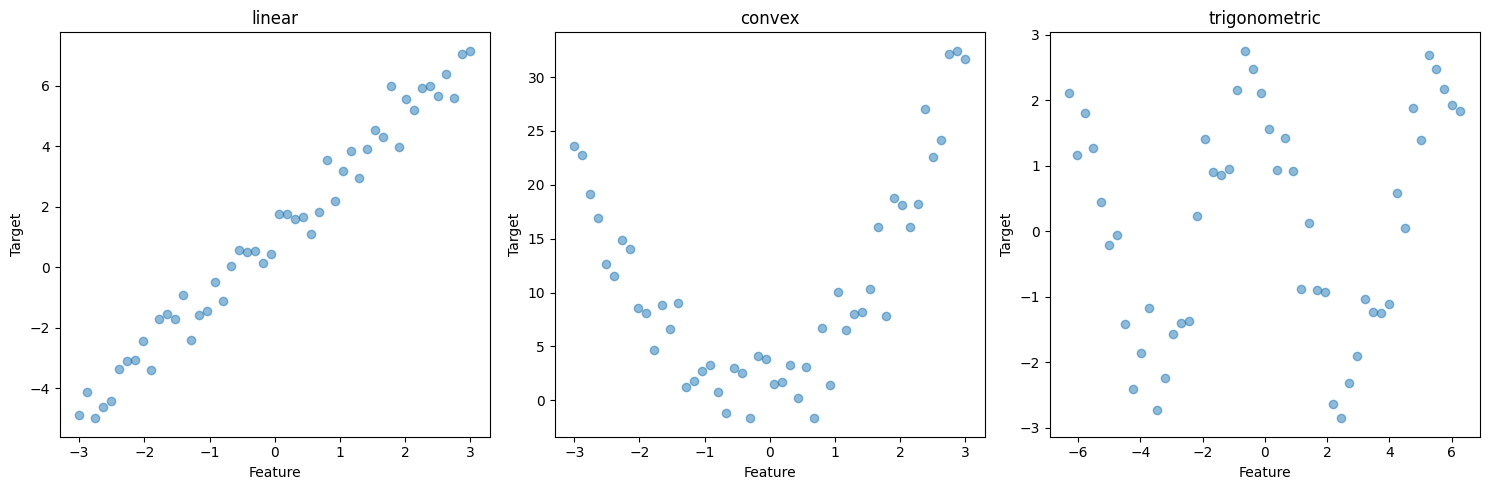

In [ ]:
### DO NOT MODIFY
import numpy as np
import matplotlib.pyplot as plt

def generate_polynomial_dataset(weights, n_samples=100, noise_level=0.1):
    """Generate a polynomial dataset."""
    X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
    y = np.zeros(n_samples)
    for i, weight in enumerate(weights):
        y += weight * (X ** i).flatten()
    y += np.random.normal(0, noise_level, size=n_samples)  # Adding noise

    return X, y

def generate_trigonometric_dataset(w_c, w_s, n_samples=100, noise_level=0.1):
    """Generate a trigonometric dataset."""
    X = np.linspace(-2 * np.pi, 2 * np.pi, n_samples).reshape(-1, 1)
    y = w_c * np.cos(X).flatten() + w_s * np.sin(X).flatten()
    y += np.random.normal(0, noise_level, size=n_samples)  # Adding noise

    return X, y

datasets = {
    "linear": generate_polynomial_dataset([1, 2], 50, 0.5),
    "convex": generate_polynomial_dataset([1, 2, 3], 50, 2.5),
    "trigonometric": generate_trigonometric_dataset(2, -1, 50, 0.5)
}

# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each dataset
for ax, dataset in zip(axes, datasets.items()):
    title, (X, y) = dataset
    ax.scatter(X, y, alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')

plt.tight_layout()
plt.show()
### DO NOT MODIFY

Above, we visualize these datasets for you to gather some ideas about how they look. Look at the visualizations and consider: What are your thoughts on using linear regression to model the non-linear patterns observed in the convex and trigonometric datasets? Do you believe linear regression is adaptable enough to accurately capture these complex relationships? (THIS IS NOT A TASK, JUST A WARM-UP for your thought process before you start working on your tasks next)

##### 1.1. Preparation of Training and Testing Sets (3 pts)

**TASK**: Implement the **split_data** function

We will now divide our three datasets into training and testing sets. For this task, you might want utilize the *train_test_split* function from *sklearn*. This step is crucial for preparing our data for the upcoming linear regression modeling, ensuring that we have separate sets for training our models and evaluating their performance.

In [ ]:
# DO NOT MODIFY
from sklearn.model_selection import train_test_split

X_linear, Y_linear = datasets["linear"]
X_convex, Y_convex = datasets["convex"]
X_tri, Y_tri = datasets["trigonometric"]

random_state = 42
np.random.seed(random_state)
test_size = 0.2

def split_data(X, Y, test_size=test_size, random_state=random_state):
    # YOUR CODE HERE (1-2 lines)
    return train_test_split(X, Y, test_size=test_size, random_state=random_state)

# DO NOT MODIFY
# Apply the function for each dataset
X_linear_train, X_linear_test, Y_linear_train, Y_linear_test = split_data(X_linear, Y_linear)
X_convex_train, X_convex_test, Y_convex_train, Y_convex_test = split_data(X_convex, Y_convex)
X_tri_train, X_tri_test, Y_tri_train, Y_tri_test = split_data(X_tri, Y_tri)

Now, let's **visualize our split dataset**. You can just use the given function to plot each of the dataset.

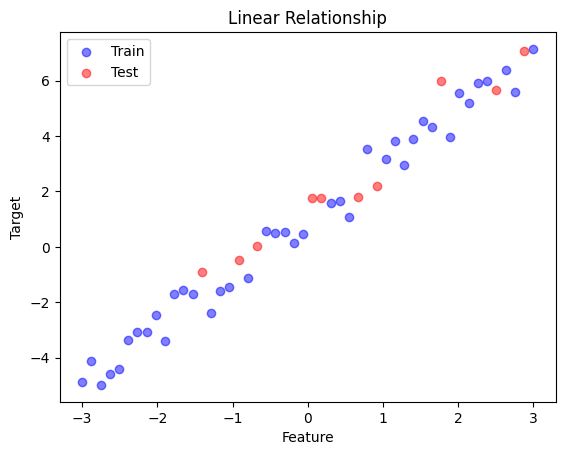

In [ ]:
# Set the variable to select the model to plot
selected_dataset = 'Linear'  # Choose between 'Linear', 'Convex', 'Trigonometric'

# DO NOT MODIFY
def draw_scatter(X_train, Y_train, X_test, Y_test, title, xlabel='Feature', ylabel='Target'):
    plt.scatter(X_train, Y_train, color='blue', label='Train', alpha=0.5)
    plt.scatter(X_test, Y_test, color='red', label='Test', alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Dictionary to store datasets
datasets = {
    'Linear': (X_linear_train, Y_linear_train, X_linear_test, Y_linear_test, 'Linear Relationship'),
    'Convex': (X_convex_train, Y_convex_train, X_convex_test, Y_convex_test, 'Convex Relationship'),
    'Trigonometric': (X_tri_train, Y_tri_train, X_tri_test, Y_tri_test, 'Trigonometric Relationship')
}

# Extract selected dataset
X_train, Y_train, X_test, Y_test, title = datasets[selected_dataset]

# Plot the selected dataset
draw_scatter(X_train, Y_train, X_test, Y_test, title)

##### 1.2. Linear Regression: Fit a line for the given dataset (6 pts)

**TASK**: Implement the ***fit_model*** and ***predict_data*** functions

You must fit on the training data and then do predictions for both the training and test sets. Use the training prediction for plotting, and the test prediction for evaluation.

*Hint: You can use LinearRegssion from sklearn.linear_model*

In [ ]:
from sklearn.linear_model import LinearRegression

# Function to fit the model
def fit_model(X_train, Y_train):
    # YOUR CODE HERE (1-2 lines)
    model = LinearRegression()
    model.fit(X_train, Y_train)
    return model

# Function to predict using the fitted model
def predict_data(model, X_train, X_test):
    # YOUR CODE HERE (1-2 lines)
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    return Y_train_pred, Y_test_pred


# DO NOT MODIFY
# Fit the model for each dataset and predict
linear_model = fit_model(X_linear_train, Y_linear_train)
Y_linear_train_pred, Y_linear_test_pred = predict_data(linear_model, X_linear_train, X_linear_test)
convex_model = fit_model(X_convex_train, Y_convex_train)
Y_convex_train_pred, Y_convex_test_pred = predict_data(convex_model, X_convex_train, X_convex_test)
trigonometric_model = fit_model(X_tri_train, Y_tri_train)
Y_tri_train_pred, Y_tri_test_pred = predict_data(trigonometric_model, X_tri_train, X_tri_test)


Plots below! We'll use the test predictions later.

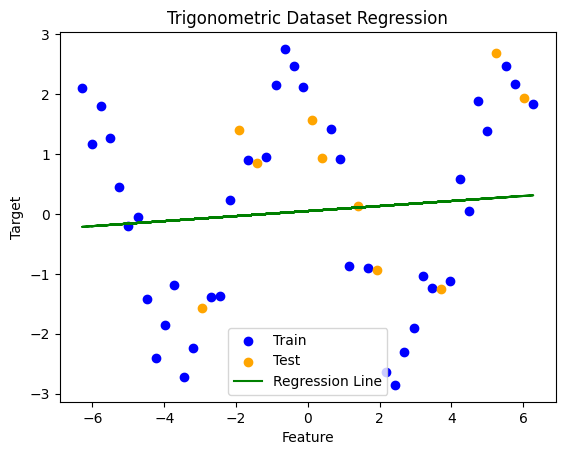

In [ ]:
# Set the variable to select the model to plot
selected_dataset = 'Trigonometric'  # Choose between 'Linear', 'Convex', 'Trigonometric'

# DO NOT MODIFY
# Function to draw scatter plot with regression line
def draw_scatter_with_regression(X_train, Y_train, X_test, Y_test, Y_train_pred, title, xlabel='Feature', ylabel='Target'):
    plt.scatter(X_train, Y_train, color='blue', label='Train')
    plt.scatter(X_test, Y_test, color='orange', label='Test')
    plt.plot(X_train, Y_train_pred, color='green', label='Regression Line')
    plt.title(title)
    plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Dictionary to store datasets and predictions
datasets = {
    'Linear': (X_linear_train, Y_linear_train, X_linear_test, Y_linear_test, Y_linear_train_pred, 'Linear Dataset Regression'),
    'Convex': (X_convex_train, Y_convex_train, X_convex_test, Y_convex_test, Y_convex_train_pred, 'Convex Dataset Regression'),
    'Trigonometric': (X_tri_train, Y_tri_train, X_tri_test, Y_tri_test, Y_tri_train_pred, 'Trigonometric Dataset Regression')
}

# Extract selected dataset
X_train, Y_train, X_test, Y_test, Y_train_pred, title = datasets[selected_dataset]

# Plot the selected dataset with regression line
draw_scatter_with_regression(X_train, Y_train, X_test, Y_test, Y_train_pred, title)


##### 1.3. Linear Model Evaluation (4 pts)
**TASK**: implement the ***evaluate_model*** function, which calculates the Mean Squared Error (MSE) and $R^2$ coefficient for each training and test split.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to calculate MSE and R^2
def evaluate_model(Y_train, Y_train_pred, Y_test, Y_test_pred):
    # YOUR CODE HERE
    mse_train = mean_squared_error(Y_train, Y_train_pred)
    mse_test = mean_squared_error(Y_test, Y_test_pred)
    r2_train = r2_score(Y_train, Y_train_pred)
    r2_test = r2_score(Y_test, Y_test_pred)
    return mse_train, mse_test, r2_train, r2_test

# DO NOT MODIFY
# Apply the function for each dataset
mse_linear_train, mse_linear_test, r2_linear_train, r2_linear_test = evaluate_model(
    Y_linear_train, Y_linear_train_pred, Y_linear_test, Y_linear_test_pred)

mse_convex_train, mse_convex_test, r2_convex_train, r2_convex_test = evaluate_model(
    Y_convex_train, Y_convex_train_pred, Y_convex_test, Y_convex_test_pred)

mse_tri_train, mse_tri_test, r2_tri_train, r2_tri_test = evaluate_model(
    Y_tri_train, Y_tri_train_pred, Y_tri_test, Y_tri_test_pred)


In [ ]:
# DO NOT MODIFY
# List of datasets and their metrics
datasets = ["Linear", "Convex", "Trigonometric"]
mse_train = [mse_linear_train, mse_convex_train, mse_tri_train]
mse_test = [mse_linear_test, mse_convex_test, mse_tri_test]
r2_train = [r2_linear_train, r2_convex_train, r2_tri_train]
r2_test = [r2_linear_test, r2_convex_test, r2_tri_test]

# Function to store and display results
def store_and_display_results(datasets, mse_train, mse_test, r2_train, r2_test):
    results = []
    for i, dataset in enumerate(datasets):
        result = {
            "Dataset": dataset,
            "MSE Train": mse_train[i],
            "MSE Test": mse_test[i],
            "R2 Train": r2_train[i],
            "R2 Test": r2_test[i]
        }
        results.append(result)

        # Display the results
        print(f"{dataset} Dataset:")
        print(f"  MSE Train: {mse_train[i]:.4f}")
        print(f"  MSE Test: {mse_test[i]:.4f}")
        print(f"  R2 Train: {r2_train[i]:.4f}")
        print(f"  R2 Test: {r2_test[i]:.4f}")
        print()  # Blank line for readability

    return results

# Store and display the results
results = store_and_display_results(datasets, mse_train, mse_test, r2_train, r2_test)


Linear Dataset:
  MSE Train: 0.2624
  MSE Test: 0.4515
  R2 Train: 0.9801
  R2 Test: 0.9366

Convex Dataset:
  MSE Train: 70.1504
  MSE Test: 109.4383
  R2 Train: 0.0840
  R2 Test: 0.0354

Trigonometric Dataset:
  MSE Train: 2.8881
  MSE Test: 1.9813
  R2 Train: 0.0088
  R2 Test: -0.0686



##### 1.4. Discussion about the Evaluation Results. (4 pts)

**TASK**: Answer following questions:

- (1) For each dataset among "Linear", "Convex", and "Trigonometric", does the model perform well based on the MSE and $R^2$ values? Answer "Yes" or "No" for each dataset.

- (2) What does it mean if the $R^2$ coefficient is 0? What does it mean if it is 1? Provide a brief explanation for each case.


*Your Answer Here!*

##### 1.5. Implement Polynomial Features (8 pts)

**TASK**: implement the ***fit_model_poly*** and ***predict_data_poly*** functions

In this section, we'll explore how to use polynomial features to transform non-linear relationships into linear ones, enabling us to apply linear regression effectively. The basic idea is think about non-linear relationships in a higher dimension. But how can we do that? Let's try with polynomial features.


You can think of these features like this...

Consider the following:

* $ y = x^2$ is non linear right?
* What if we said $\alpha = x^2$, so $y = \alpha$?
*Then if you plot $y$ versus $\alpha$ you would get a linear relationship!

Given the provided code below, your task is to implement polynomial regression models for three distinct datasets: linear, convex, and trigonometric to predict outcomes for both training and test data for each dataset :


We recommend using the sklearn ['make_pipeline'](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) and ['PolynomialFeatures'](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) for this part.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# Function to fit the polynomial model
def fit_model_poly(X_train, Y_train, degree):
    # YOUR CODE HERE
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, Y_train)
    return model

# Function to predict using the fitted polynomial model
def predict_data_poly(model, X_train, X_test):
    # YOUR CODE HERE
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    return Y_train_pred, Y_test_pred

# DO NOT MODIFY
# Define degrees for polynomial features
degree_linear = 1  # For the linear dataset, a degree of 1 is just a linear relationship
degree_convex = 3  # For the convex dataset, let's try a quadratic model
degree_tri = 8    # For the trigonometric dataset, a higher degree might capture the sine/cosine waves

# Fit and predict for the linear dataset
linear_model_poly = fit_model_poly(X_linear_train, Y_linear_train, degree_linear)
Y_linear_train_pred_poly, Y_linear_test_pred_poly = predict_data_poly(linear_model_poly, X_linear_train, X_linear_test)

# Fit and predict for the convex dataset
convex_model_poly = fit_model_poly(X_convex_train, Y_convex_train, degree_convex)
Y_convex_train_pred_poly, Y_convex_test_pred_poly = predict_data_poly(convex_model_poly, X_convex_train, X_convex_test)

# Fit and predict for the trigonometric dataset
trigonometric_model_poly = fit_model_poly(X_tri_train, Y_tri_train, degree_tri)
Y_tri_train_pred_poly, Y_tri_test_pred_poly = predict_data_poly(trigonometric_model_poly, X_tri_train, X_tri_test)


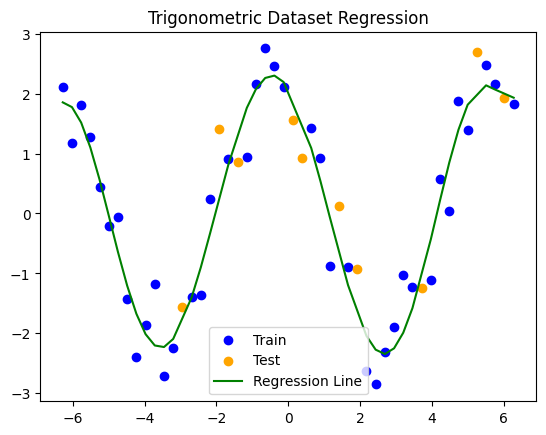

In [ ]:
# Set the variable to select the model to plot
selected_dataset = 'Trigonometric'  # Choose between 'Linear', 'Convex', 'Trigonometric'

# DO NOT MODIFY
# Function to plot dataset with regression line
def plot_dataset_with_regression(X_train, Y_train, X_test, Y_test, Y_train_pred, title):
    sorted_idx = np.argsort(X_train.ravel())
    plt.scatter(X_train, Y_train, color='blue', label='Train')
    plt.scatter(X_test, Y_test, color='orange', label='Test')
    plt.plot(X_train[sorted_idx], Y_train_pred[sorted_idx], color='green', label='Regression Line')
    plt.title(title)
    plt.legend()
    plt.show()

# Dictionary to store datasets and predictions
datasets = {
    'Linear': (X_linear_train, Y_linear_train, X_linear_test, Y_linear_test, Y_linear_train_pred_poly, 'Linear Dataset Regression'),
    'Convex': (X_convex_train, Y_convex_train, X_convex_test, Y_convex_test, Y_convex_train_pred_poly, 'Convex Dataset Regression'),
    'Trigonometric': (X_tri_train, Y_tri_train, X_tri_test, Y_tri_test, Y_tri_train_pred_poly, 'Trigonometric Dataset Regression')
}

# Extract selected dataset
X_train, Y_train, X_test, Y_test, Y_train_pred, title = datasets[selected_dataset]

# Plot the selected dataset with regression line
plot_dataset_with_regression(X_train, Y_train, X_test, Y_test, Y_train_pred, title)


In [ ]:
# DO NOT MODIFY

# Calculate for all datasets
mse_linear_train_poly, mse_linear_test_poly, r2_linear_train_poly, r2_linear_test_poly = evaluate_model(
    Y_linear_train, Y_linear_train_pred_poly, Y_linear_test, Y_linear_test_pred_poly)

mse_convex_train_poly, mse_convex_test_poly, r2_convex_train_poly, r2_convex_test_poly = evaluate_model(
    Y_convex_train, Y_convex_train_pred_poly, Y_convex_test, Y_convex_test_pred_poly)

mse_tri_train_poly, mse_tri_test_poly, r2_tri_train_poly, r2_tri_test_poly = evaluate_model(
    Y_tri_train, Y_tri_train_pred_poly, Y_tri_test, Y_tri_test_pred_poly)

# Print the MSE and R^2 values for both training and testing sets for each dataset with polynomial features
print("Linear Dataset with Polynomial Features:")
print(f"Train - MSE: {mse_linear_train_poly:.4f}, R^2: {r2_linear_train_poly:.4f}")
print(f"Test - MSE: {mse_linear_test_poly:.4f}, R^2: {r2_linear_test_poly:.4f}\n")

print("Convex Dataset with Polynomial Features:")
print(f"Train - MSE: {mse_convex_train_poly:.4f}, R^2: {r2_convex_train_poly:.4f}")
print(f"Test - MSE: {mse_convex_test_poly:.4f}, R^2: {r2_convex_test_poly:.4f}\n")

print("Trigonometric Dataset with Polynomial Features:")
print(f"Train - MSE: {mse_tri_train_poly:.4f}, R^2: {r2_tri_train_poly:.4f}")
print(f"Test - MSE: {mse_tri_test_poly:.4f}, R^2: {r2_tri_test_poly:.4f}\n")

Linear Dataset with Polynomial Features:
Train - MSE: 0.2624, R^2: 0.9801
Test - MSE: 0.4515, R^2: 0.9366

Convex Dataset with Polynomial Features:
Train - MSE: 4.6897, R^2: 0.9388
Test - MSE: 14.6933, R^2: 0.8705

Trigonometric Dataset with Polynomial Features:
Train - MSE: 0.2251, R^2: 0.9227
Test - MSE: 0.3763, R^2: 0.7971



### Section 2: Linear Regression Model Design (15 points)

The mean-squared error loss is one of the basic loss that can be used for linear regression.

$$L_\text{MSE} = \frac{1}{n}\sum_{i=1}^n(\hat{Y}_i - Y_i)^2$$
$$\hat{Y}_i = \theta_1 X_i + \theta_2$$

Reminder: $\frac{\partial f}{\partial x}$ means taking the derivative of $f$ with respect to $x$, assuming ALL other variables are constants.

Sources:

https://tutorial.math.lamar.edu/classes/calciii/partialderivatives.aspx

https://tutorial.math.lamar.edu/classes/calci/DerivativeIntro.aspx



##### 2.1. Derive the gradients $\frac{\partial L}{\partial\theta_1}, \frac{\partial L}{\partial\theta_2}$ (3 pts).



**Student Response** (preferred latex, equation must be readable)



**ANSWER:**

$$ \frac{\partial L}{\partial \theta_1} = \frac{1}{n} \sum_{i=1}^n [2 X_i (\theta_1 X_i + \theta_2 - Y_i)]$$

$$ \frac{\partial L}{\partial \theta_2} = \frac{1}{n} \sum_{i=1}^n [2 (\theta_1 X_i + \theta_2 - Y_i)$$

##### 2.2 Implement our SimpleLinearRegression class (12 pts)





**TASK**: Your task is to complete the implementation of a Simple Linear Regression model using gradient descent from scratch.

You may have to follow these steps: <br>

* Initialize model parameters.
* Implement gradient descent to iteratively update the model parameters.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        # YOUR CODE HERE
        self.m = 0.0
        self.b = 0.0


    def fit(self, X, Y):
        # YOUR CODE HERE
        n = X.shape[0]
        for _ in range(self.iterations):
            Y_pred = self.m * X + self.b
            dM = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
            dB = (-2/n) * sum(Y - Y_pred)        # Derivative wrt b
            self.m -= self.learning_rate * dM
            self.b -= self.learning_rate * dB

    def predict(self, X):
        # YOUR CODE HERE
        return self.m * X + self.b


The following code will test your implementation.

In [ ]:
### DO NOT MODIFY
def test_linear_regression(model, X, Y):
    model.fit(X, Y)
    predictions = model.predict(X)

    relative_error = np.mean(np.abs((Y - predictions) / (Y + 1e-8)))
    return relative_error < 0.02

test_datasets = [
    (np.array([1, 2, 3, 4, 5]), np.array([2, 4, 6, 8, 10])),
    (np.array([1, 2, 3, 4, 5]), np.array([1, 4, 9, 16, 25])),
    (np.array([0, 0, 1, 1]), np.array([0, 1, 1, 0]))
]

# Initialize the model
model = SimpleLinearRegression(learning_rate=0.001, iterations=5000)


# Test each dataset
results = [test_linear_regression(model, X, Y) for X,Y in test_datasets]
answers = [True, False, False]
if results == answers:
  print("Good job!")
else:
  print("Wrong Implmentation! Your linear regression model needs more testing!")
  assert(False)

### DO NOT MODIFY

Good job!


##### 2.3 Train your model (8 pts)
**TASK**:
- Train your *SimpleLinearRegression* model
- Predict the scores for studying 1.5 hours and 3.5 hours.

The following code will visualize your regression results. Use the model to **predict the scores for studying 1.5 hours and 3.5 hours**.

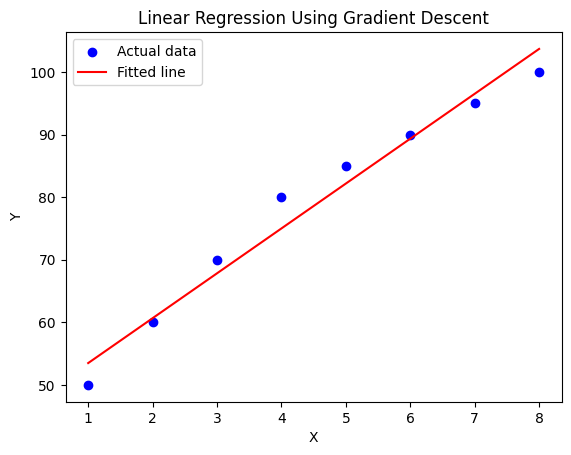

Predicted score for studying 1.5 hours: 57.077044140716254
Predicted score for studying 3.5 hours: 71.41650328408781


In [ ]:
### DO NOT MODIFY
# Given dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8])  # Hours Studied
Y = np.array([50, 60, 70, 80, 85, 90, 95, 100])  # Test Score
X_test = np.array([1.5, 3.5])


### YOUR CODE HERE
model = SimpleLinearRegression(learning_rate=0.001, iterations=10000)
model.fit(X, Y)
score_1_5_hour = model.predict(1.5)
score_3_5_hour = model.predict(3.5)

### DO NOT MODIFY
def plot_regression_line(model, X, Y):
    # Predict values
    Y_pred = model.predict(X)

    # Plotting the regression line and the data points
    # Plot your predictions on X.
    plt.scatter(X, Y, color='blue', label='Actual data')
    plt.plot(X, Y_pred, color='red', label='Fitted line')
    plt.title('Linear Regression Using Gradient Descent')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
plot_regression_line(model, X, Y)
print("Predicted score for studying 1.5 hours:", model.predict(1.5))
print("Predicted score for studying 3.5 hours:", model.predict(3.5))

##### (BONUS) 2.4. Calculate the Exact Solution to the Linear Regressor (5 points)



Derive exact solution for $\theta$ when $$L = \frac{1}{N} (X \theta - y)^T (X \theta - y))$$

This is for multidimensional linear regression, and is the exact solution overall. Your answer should be the solution for $\theta$ that results in the **minimal value for the loss**. This is ideally the value that all gradient descent approaches would converge to during linear regression gradient descent.

Hint: this [matrix derivative sheet](https://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) may be helpful

**Student response here** (preferred latex, equation must be readable)

### Section 3 : Can Regression do Classification? (15 points)
Starting at the beginning, linear models are the simplest type of model possible. They imply that our data, when graphed in a mathematical basis, can be separated by a curve that is a line (in 2 dimensions), a plane (in 3 dimensions), or a hyperplane (> 3 dimensions).


What about using what we've done for classification? Can we apply our newfound regression skills to classify things? Let's try! You already have a lot of knowledge about classification, so some of the basics from the last homework will not be repeated.

Consider the following plot

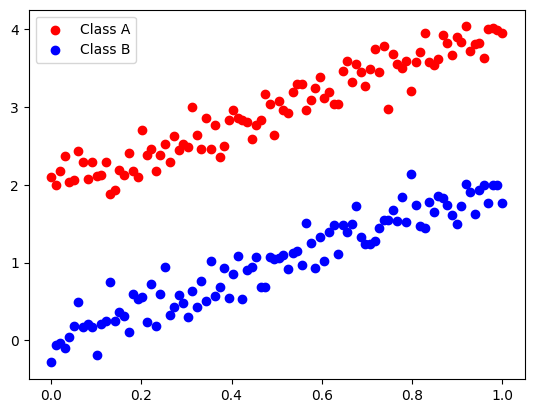

In [ ]:
### DO NOT MODIFY
x_axis = np.linspace(0, 1, 100)
class_a = 2 * x_axis + 1 + np.random.normal(1, 0.2, x_axis.shape[0])
class_b = 2 * x_axis + 1 + np.random.normal(-1, 0.2, x_axis.shape[0])

plt.scatter(x_axis, class_a, color='r', label='Class A')
plt.scatter(x_axis, class_b, color='b', label='Class B')
plt.legend()

There is a very evident line that separates our classes here, one that we humans could easily draw by hand. Let's see if we can get a computer to find this for us!

##### 3.1: GD Linear Classifier

We wish to create a function of the form

$$ g(x) = mx + b$$

where $m$ is the slope of a line, $b$ is a bias term, and $x$ is the function variable. But! More specifically, we want our output $f$ to be a 'class'... a binary choice (in the case of 2 classes). So instead we will define..

$$ f(x) = 1 \space\text{if}\space y > g(x) \space \text{else} \space 0$$

where a 1 represents class 'A', and 0 represents class 'B'.

So, we parameterize the curve like so...

$$ g(x) = \theta_1 x + \theta_2 $$

meaning I can define

$$g(x;\theta) = \theta_1 x + \theta_2$$

and $g$ in a similar fashion.

In theory, there exists at least one (we can draw it) line $g^* (x;\theta^*)$ that perfectly separates the data. The $^*$ represents 'optimal'.

The mathematically curious among you may choose to verify that there is a way to calculate the EXACTLY correct answer here, but for now we will choose to use an optimization technique to hone in on the correct values for $\theta_1, \theta_2$.

The optimization we will choose to use is standard gradient descent, where using the chain rule we can find the direction in which to optimize $\vec{\theta}$ such that we approach an optimal solution.

This means we will **start** by effectively training a linear regression model and using for classification. Just as a sneak peak ahead, what do you think might go wrong? (no need to answer, just think about it)

This is your data to use below. Do not modify it, just the variable names. **You should only access x_data_full and y_data_full in your code!!**

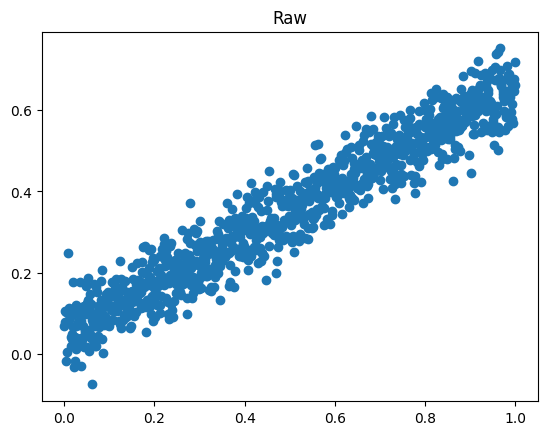

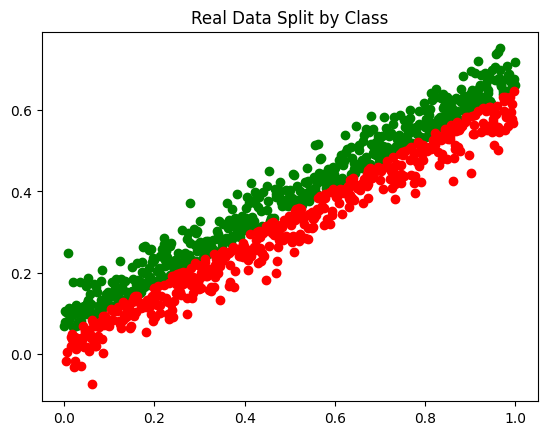

In [ ]:
### DO NOT MODIFY

m_star = 0.6
b_star = 0.05

x_data_full = np.linspace(0, 1, 1000)
y_data_full = m_star * x_data_full + b_star + np.random.normal(0, 0.05,
                                                          x_data_full.shape[0])
plt.scatter(x_data_full, y_data_full)
plt.title("Raw")
plt.show()

def calc(theta, x_data):
  return theta[0] * x_data + theta[1]

calced_values = calc([m_star, b_star], x_data_full)
true_x_a = []
true_x_b = []
true_y_a = []
true_y_b = []
for i in range(x_data_full.shape[0]):
  val = y_data_full[i]
  if val > calced_values[i]:
    true_x_a.append(x_data_full[i])
    true_y_a.append(y_data_full[i])
  else:
    true_x_b.append(x_data_full[i])
    true_y_b.append(y_data_full[i])

plt.scatter(true_x_a, true_y_a, color='g')
plt.scatter(true_x_b, true_y_b, color='r')
plt.title("Real Data Split by Class")
plt.show()

##### 3.1 (2 point)

TASK: Create a numpy vector for theta, randomize it below. You may choose any method of randomly generating it you like **besides hardcoding the values!!**

In [ ]:
# YOUR CODE HERE
def get_random_vector():
  vec = np.random.normal(0, 1, 2)
  return vec

### DO NOT MODIFY
theta = get_random_vector()
print(theta)

[ 0.1252245  -0.42940554]


##### 3.2 (4 points)


TASK: **Plot the line** created by your theta and **color everything** that is classified correctly green, and everything incorrectly red.

**Assume that everything above the line is class A, everything below is class B**

**HINT: It may be useful to create a function for this task in the future. Given a theta, and the dataset, highlight correct values.**

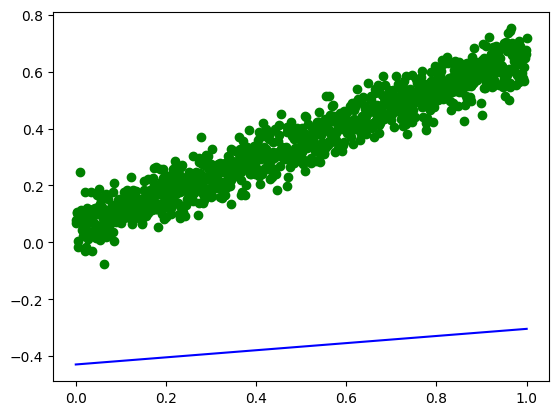

In [ ]:
### DO NOT MODIFY
def calc(el, x_data):
  return el[0] * x_data + el[1]

def separate(x_data, y_data, el):
  calced_values = calc(el, x_data)

  true_x_a = []
  true_x_b = []
  true_y_a = []
  true_y_b = []
  for i in range(x_data.shape[0]):
    val = y_data[i]
    if val > calced_values[i]:
      true_x_a.append(x_data[i])
      true_y_a.append(y_data[i])
    else:
      true_x_b.append(x_data[i])
      true_y_b.append(y_data[i])

  return (true_x_a, true_y_a), (true_x_b, true_y_b)


### YOUR CODE HERE
def plot_predictions(x_a, x_b, y_a, y_b, theta):
  plt.scatter(x_a, y_a, color='g')
  plt.scatter(x_b, y_b, color='r')
  xv = np.sort(np.array(x_a + x_b))
  plt.plot(xv, calc(theta, xv), color='b')
  plt.show()

r1, r2 = separate(x_data_full, y_data_full, theta)
x_a_pred, y_a_pred = r1
x_b_pred, y_b_pred = r2

plot_predictions(x_a_pred, x_b_pred, y_a_pred, y_b_pred, theta)

Way off!! Let's do some regression work now and get into the nitty gritty. This is just like what you did before.

##### 3.3 Write a function for the loss (3 point)
TASK: Define your loss function as the MSE loss.

In [ ]:
### YOUR CODE HERE

def mse_loss(true_values, predictions):
  return sum((1/len(true_values)) * (true_values - predictions) ** 2)

##### 3.4: Training Loop (5 points)

TASK: Now write the training loop...

1. Start with your initialized theta.
2. Fix the learning rate (we've fixed it for you)
3. Define the number of steps to run (we've fixed that too!)
4. For each step, perform a training step. Print the loss, **if you'd like**. **Do print the final loss**. **You have a simple linear regression model from earlier**
5. After the last step, graph your line and classify the points. If they're above your line, it's class A. If they're below, class B.
6. Graph your line, and the two classes as you drew them.
7. Compare your output to the real line that separates the classes. How far off were you? How many points did you miss?


(1000,) (1000,)
FINAL LOSS 0.0037213583558249087
523
456


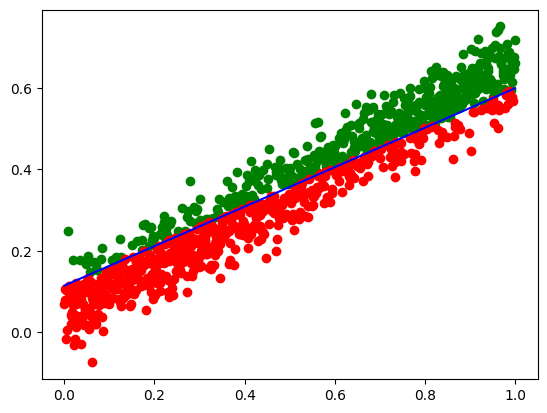

In [ ]:
lr = 0.01 ### DO NOT CHANGE
num_steps = 1000 ### DO NOT CHANGE

### YOUR CODE HERE
model = SimpleLinearRegression(learning_rate = lr, iterations = num_steps)
model.fit(x_data_full, y_data_full)
loss = mse_loss(y_data_full, model.predict(x_data_full))
print(y_data_full.shape, model.predict(x_data_full).shape)

print(f"FINAL LOSS {loss}")
r1, r2 = separate(x_data_full, y_data_full, [model.m, model.b])
x_a_pred, y_a_pred = r1
x_b_pred, y_b_pred = r2
print(len(true_x_a))
print(len(r1[0]))
plot_predictions(x_a_pred, x_b_pred, y_a_pred, y_b_pred, [model.m, model.b])

In [ ]:
print("Number of Predicted Points with label A:", len(y_a_pred))
print("Number of GT Points with label A:", len(true_y_a))

print("Missed Points", abs(len(y_a_pred) - len(true_y_a)))

Number of Predicted Points with label A: 456
Number of GT Points with label A: 523
Missed Points 67


##### 3.5: What went wrong? (2 points)
In the textbox below, explain why you think this method of training the linear classifier from above Part 4 failed. Shouldn't it have worked? What lessons should you take away from this for doing machine learning in data science?


Try to write at least three sentences. The more you write here, the better, as the purpose of this question is to encourage ** deep thinking** about why our approach above didn't work. If you can support your work with math, that'll make your answer even stronger!!

**ANSWER**

Very open question. Do focus on if students hone in on the idea that the regression model picked up on **a** linear relationship in the data. It was not explicitly using class information. This should highlight the fact that the idea of  **what model to use** absolutely MUST be carefully considered in any problem. They must consider the underlying mathematical relations in the data, what they are training a model to do, instead of just throwing the kitchen sink at a problem.

The line **looks** right, but is not the perfect dividing line.

**GRADE LIGHTLY** and focus on providing **FEEDBACK**, not deductions. This is meant to help the students think deeply about this assignment.

##### Handling More complicated data?

Excellent! We can classify data using a linear plane, and it's merely a mathematical exercise to extend this concept to higher dimensions.I.e. all the partials you computed earlier, now you just end up with more partial derivatives.

You have partial derivatives with each of the dimensions as you have a linear component in each of the dimensions.

Technically you also have 'y-intercepts' for each of the dimensions as well, but they can be combined into one constant term. This gives you $d+1$ weights to tune, where $d$ is the dimensionality of the X data.

But... what about this?

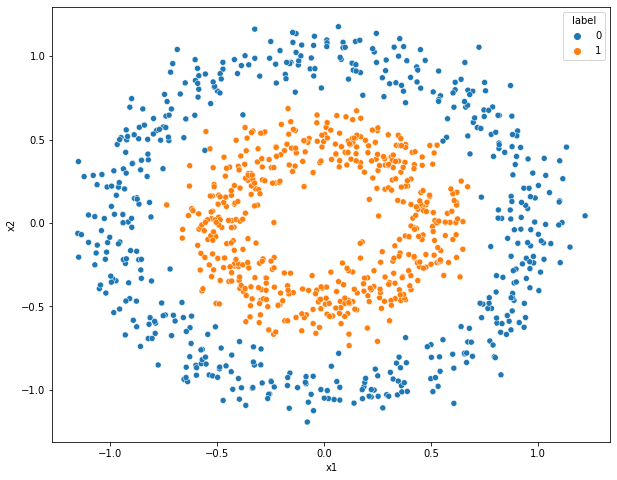

No good solution now...

What about this instead?

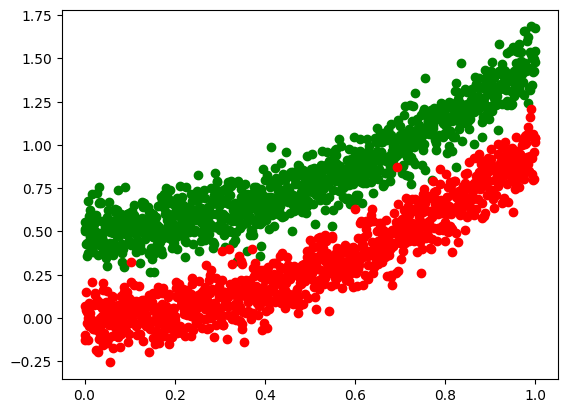

In [ ]:
y_data_full = x_data_full ** 2

class_a = x_data_full ** 2 + np.random.normal(0.5, 0.1, x_data_full.shape[0])
class_b = x_data_full ** 2 + np.random.normal(0, 0.1, x_data_full.shape[0])

plt.scatter(x_data_full, class_a, color='g')
plt.scatter(x_data_full, class_b, color='r')

No good. We can't separate data that looks like that. Not linearly anyway.

BUT! What if we redefine our basis? Instead of our y direction being linear in x, what if it was $x^2$?

Text(0.5, 0, 'x squared')

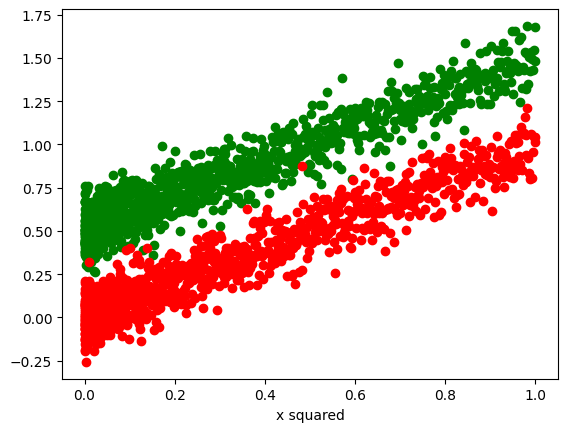

In [ ]:
x_squared = x_data_full ** 2

plt.scatter(x_squared, class_a, color='g')
plt.scatter(x_squared, class_b, color='r')

plt.xlabel('x squared')

Hey look! It's linear! What does this mean? By casting into higher dimensional spaces through a **kernel function**, we can linearly separate our data.

Of course we chose a very simple kernel.

But for more complex data there are a variety of kernels. Go look some up! **'Kernel trick SVM'** should give you plenty of great resources.




##### 3.6: List some different kernels you found online, their names. (3 points)


*Your Answer Here*

#### Now, our final point is that **figuring out the kernel to use** is incredibly difficult, and effectively maps our data from raw $(x, y)$ space to some feature space $(\phi(x), \phi(y))$ as fixed by our kernel function.

To **learn** this feature space, instead of guess and check with kernel methods, we invented **neural networks**... and many other methods that perform **representation learning**. **THIS** is the power of neural networks.

### Section 4: Neural Networks (25 points)

In the final test, and meat of the homework, we want you to perform a real world regression all on your own. You know the fundamental underlying ideas, so let's use some real world libraries and methods to actually do regression on a **real** dataset.

We'll be using pytorch for this next section. Look at (https://pytorch.org/tutorials/beginner/basics/intro.html) for a run down on pytorch basics.


##### 4.1. Preparation of Data Loaders (10 pts)

**TASK**: Prepare **train_loader** and **test_loader**.

**Requirements**:
- Use **train_test_split** to set aside **20%**of the entire dataset as the test set.
- Set the **batch size** to **32** for both loaders.
- Normalize the dataset using StandardScaler to make it **zero mean** and **unit variance** for each feature dimension.
- Ensure that **train_loader** samples the dataset randomly (refer to the **shuffle** argument in DataLoader).
- Set **batch_size**, **num_train_data**, **num_test_data**, **feat_dim** values from your train/test loaders. **num_X_data** refers to the number of data samples, not the number of batches. **DO NOT HARDCODE THESE VALUES**



In [ ]:
### DO NOT MODIFY HERE!
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = fetch_california_housing()
X, y = data.data, data.target

In [ ]:
### YOUR ANSWER HERE

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
for a, b in enumerate(train_loader):
    print(a,b)
batch_size = train_loader.batch_size
num_train_data = len(train_loader) * batch_size
num_test_data = len(test_loader) * batch_size
feat_dim = train_loader.dataset[0][0].shape[0]

In [ ]:
### DO NOT MODIFY HERE!
try:
    assert(type(train_loader) == DataLoader)
    assert(type(test_loader) == DataLoader)
except:
    print('"train_loader" and "test_loader" must be DataLoader type!')

print("Batch Size:", batch_size)
print("Number of Train Data:", num_train_data)
print("Number of Test Data:", num_test_data)
print("Feature Dimension:", feat_dim)

Batch Size: 32
Number of Train Data: 16512
Number of Test Data: 4128
Feature Dimension: 8


##### 4.2. Define Multi-Layer Perceptron Model (5 pts)

**TASK**: Implement the **MLPModel** and instantiate
 the **model** variable.

**Requirements**:
- The MLP model consists of three fully-connected linear layers.
- Use **relu** activation functions between each layer
- Do not apply the activation function to the final output. (It should directly come from the linear layer. Why? Think about it)

In [ ]:
### YOUR ANSWER HERE
class MLPModel(nn.Module):
    def __init__(self, feat_dim):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(feat_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Instantiate the model
model = MLPModel(feat_dim=X_train.shape[1])

In [ ]:
### DO NOT MODIFY HERE!
try:
    assert(type(model) == MLPModel)
except:
    print('"model" must be MLPModel type!')

num_layers = len(list(model.children()))
input_dim = list(model.children())[0].in_features
output_dim = list(model.children())[-1].out_features

print("Number of Layers:", num_layers)
print("Input Dimension:", input_dim)
print("Output Dimension:", output_dim)

Number of Layers: 3
Input Dimension: 8
Output Dimension: 1


##### 4.3. Implement the MLP Training Loop (10 pts)

**TASK**: Implement the training loop with adequate loss function and optimizer.

**Requirements**:
- Use the **Adam** optimizer and the **MSELoss** function.
- Your training training loop should implement both the forward pass (calculating losses) and the backward pass(zeroing the graidng and updating the parameters from the loss gradients)

In [1]:
### YOUR ANSWER HERE
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


epochs = 100
losses = []
for epoch in range(epochs):
    running_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        ### YOUR ANSWER HERE
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses.append(loss.item())
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

print('Finished Training')

NameError: name 'nn' is not defined

Train Loss: 0.2657457554799526
Test Loss: 0.2897254644438278


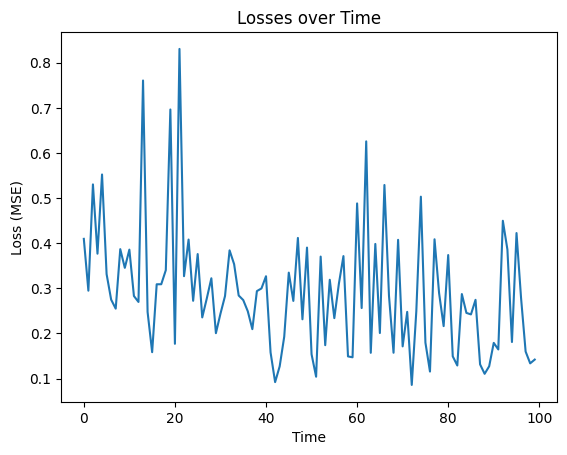

In [ ]:
### DO NOT MODIFY HERE!
test_loss = 0.0
for batch_idx, (data, targets) in enumerate(test_loader):
    loss = criterion(model(data), targets)
    test_loss += loss.item()
test_loss = test_loss / len(test_loader)

train_loss = 0.0
for batch_idx, (data, targets) in enumerate(train_loader):
    loss = criterion(model(data), targets)
    train_loss += loss.item()
train_loss = train_loss / len(train_loader)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

plt.plot(losses)
plt.title("Losses over Time")
plt.xlabel("Time")
plt.ylabel("Loss (MSE)")
plt.show()

### Bonus Section: Convolutional Neural Networks (15 points)

For this last bonus section, you will implement and train a convolutional neural network for the classification task on the CIFAR10 image dataset. (You can refer to this page for these questions: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

##### B.1. Preparation of Data Loaders (5 pts)

**TASK**: Prepare **train_loader** and **test_loader**.

**Requirements**:
- Set the **batch size** to **4** for both loaders.
- Ensure that **train_loader** samples the dataset randomly (refer to the **shuffle** argument in DataLoader).

In [ ]:
### DO NOT MODIFY HERE!
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Load the data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
### YOUR ANSWER HERE
batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

batch_size = train_loader.batch_size
num_train_data = len(train_loader) * batch_size
num_test_data = len(test_loader) * batch_size
feat_dim = train_loader.dataset[0][0].shape[0]
image_size = train_loader.dataset[0][0].shape[1:]

In [ ]:
### DO NOT MODIFY HERE!
try:
    assert(type(train_loader) == DataLoader)
    assert(type(test_loader) == DataLoader)
except:
    print('"train_loader" and "test_loader" must be DataLoader type!')

print("Batch Size:", batch_size)
print("Number of Train Data:", num_train_data)
print("Number of Test Data:", num_test_data)
print("Feature Dimension:", feat_dim)
print("Image Size:", image_size)

Batch Size: 4
Number of Train Data: 50000
Number of Test Data: 10000
Feature Dimension: 3
Image Size: torch.Size([32, 32])


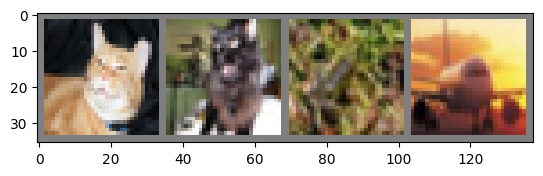

cat   cat   frog  plane


In [ ]:
### DO NOT MODIFY HERE!
# get some random training images
data_iter = iter(train_loader)
data, targets = next(data_iter)

# show images
imshow(torchvision.utils.make_grid(data))
# print labels
print(' '.join(f'{classes[targets[j]]:5s}' for j in range(batch_size)))

##### B.2. Define Convolutional Neural Netwtork (5 pts)

**TASK**: Implement the **ConvNetModel** and instantiate
 the **model** variable.

**Requirements**:
- The model should include **Conv2d**, **MaxPool2D**, and **Linear** layers. For example, you can define layers such as conv1, pool, conv2, fc1, fc2, and fc3, with ReLU activations between them.
- The final output of the network should come directly from a **Linear** layer without an activation function.

In [ ]:
### YOUR ANSWER HERE

class ConvNetModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNetModel()

In [ ]:
### DO NOT MODIFY HERE!
try:
    assert(type(model) == ConvNetModel)
except:
    print('"model" must be ConvNetModel type!')

num_layers = len(list(model.children()))
input_ch = list(model.children())[0].in_channels
output_dim = list(model.children())[-1].out_features

print("Number of Layers:", num_layers)
print("Input Channels:", input_ch)
print("Output Dimension:", output_dim)

Number of Layers: 6
Input Channels: 3
Output Dimension: 10


##### B.3. Implement the ConvNet Training Loop (5 pts)

**TASK**: Implement the training loop with adequate loss function and optimizer.

**Requirements**:
- Use the **Adam** optimizer and the **CrossEntropyLoss** function.
- Your training training loop should implement both the forward pass (calculating losses) and the backward pass(zeroing the graidng and updating the parameters from the loss gradients)

In [ ]:
### YOUR ANSWER HERE
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

epochs = 2
for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader, 0):
        ### YOUR ANSWER HERE
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if batch_idx % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {batch_idx + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.236
[1,  4000] loss: 1.913
[1,  6000] loss: 1.697
[1,  8000] loss: 1.556
[1, 10000] loss: 1.513
[1, 12000] loss: 1.452
[2,  2000] loss: 1.380
[2,  4000] loss: 1.353
[2,  6000] loss: 1.318
[2,  8000] loss: 1.308
[2, 10000] loss: 1.280
[2, 12000] loss: 1.262
Finished Training


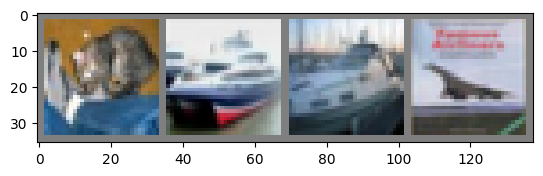

GroundTruth:  cat   ship  ship  plane
Prediction:  cat   car   ship  plane


In [ ]:
### DO NOT MODIFY HERE!
data_iter = iter(test_loader)
data, targets = next(data_iter)

outputs = model(data).softmax(dim=1).max(dim=1).indices

# print images
imshow(torchvision.utils.make_grid(data))

print('GroundTruth: ', ' '.join(f'{classes[targets[j]]:5s}' for j in range(4)))
print('Prediction: ', ' '.join(f'{classes[outputs[j]]:5s}' for j in range(4)))